# Pymaceuticals Inc.
---

### Analysis


 

In [322]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress


mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [323]:
df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
mice_count = df["Mouse ID"].unique().size
mice_count

249

In [357]:

dup_mouse = df.loc[df.duplicated(subset = ['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
dup_mouse


array(['g989'], dtype=object)

In [361]:
df[df["Mouse ID"] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [368]:
clean_df = df[df["Mouse ID"].isin(dup_mouse) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [371]:
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [346]:
drug_regimen = df.groupby("Drug Regimen")

mean_tumor = drug_regimen.aggregate(np.mean)
mean_tumor = mean_tumor["Tumor Volume (mm3)"]

median_tumor = drug_regimen.aggregate(np.median)
median_tumor = median_tumor["Tumor Volume (mm3)"]

var_tumor = drug_regimen.aggregate(np.var)
var_tumor = var_tumor["Tumor Volume (mm3)"]

std_tumor = drug_regimen.aggregate(np.std)
std_tumor = std_tumor["Tumor Volume (mm3)"]

tumor_statistics = pd.DataFrame({"Mean Tumor Volume" : mean_tumor,
                                "Median Tumor Volume" : median_tumor,
                                "Tumor Volume Variance" : var_tumor,
                                "Tumor Volume Std. Dev." : std_tumor})
tumor_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [318]:

drug_regimen = df.set_index(["Drug Regimen"])

mean_tumor_volume = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_volume = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('var')
std_tumor_volume = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('std')
sem_tumor_volume = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('sem')


tumor_statistics_agg_df = pd.DataFrame({"mean" : mean_tumor_volume,
                                   "median" : median_tumor_volume,
                                   "var": var_tumor_volume,
                                   "std": std_tumor_volume,
                                   "sem": sem_tumor_volume})
tumor_statistics_agg_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [79]:
drug_regimen_two = df.set_index(["Drug Regimen"])
time = df.groupby("Drug Regimen")["Timepoint"].count()
dr_df = pd.DataFrame({"Timepoint" : time})
dr_df

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


Text(0, 0.5, 'Number of Mice Tested')

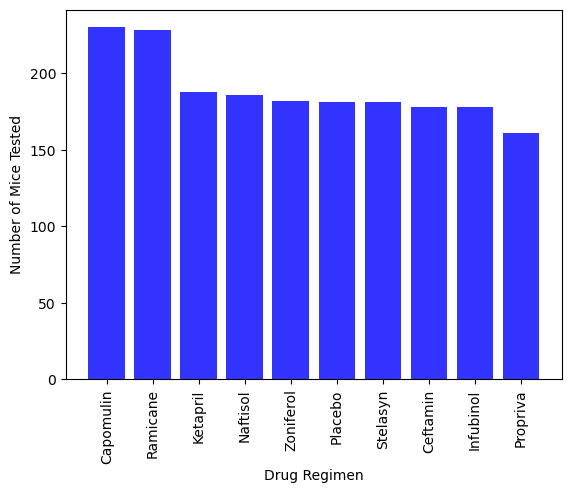

In [84]:

drug_regimen_bar = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", 
                   "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
timepoints_bar = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]

plt.bar(drug_regimen_bar, timepoints_bar, color='b', alpha=0.8, align="center")
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


<AxesSubplot:xlabel='Drug Regimen'>

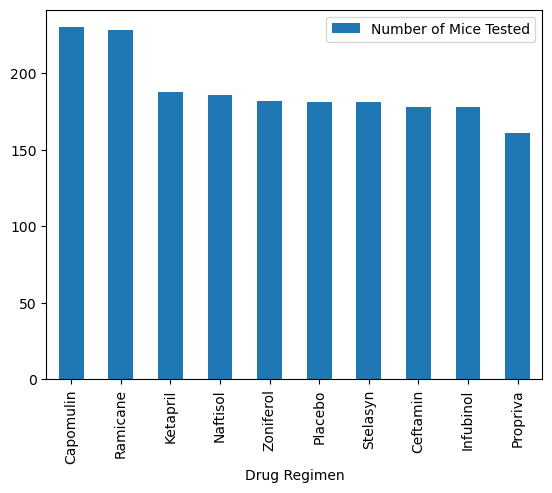

In [399]:
barplot_df = pd.DataFrame({"Drug Regimen" : ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", 
                   "Stelasyn", "Ceftamin", "Infubinol", "Propriva"], 
                           "Number of Mice Tested" : [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]})
barplot = barplot_df.plot.bar(x= "Drug Regimen", y = "Number of Mice Tested", rot = 90)
barplot

In [99]:

male = df[(df["Sex"] == "Male")]
male.count()

Mouse ID              958
Drug Regimen          958
Sex                   958
Age_months            958
Weight (g)            958
Timepoint             958
Tumor Volume (mm3)    958
Metastatic Sites      958
dtype: int64

In [101]:
female = df[(df["Sex"] == "Female")]
female.count()

Mouse ID              935
Drug Regimen          935
Sex                   935
Age_months            935
Weight (g)            935
Timepoint             935
Tumor Volume (mm3)    935
Metastatic Sites      935
dtype: int64

<AxesSubplot:ylabel='Count'>

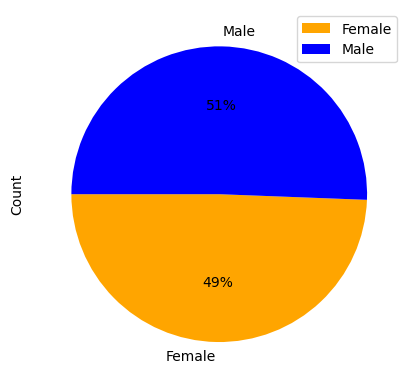

In [110]:

pie_df = pd.DataFrame({"Sex" : ["Male", "Female"], "Count" : [958, 935]})
colors = ["orange", "blue"]

pie_df.groupby(["Sex"]).sum().plot(kind='pie', y='Count', 
  autopct='%1.0f%%', colors=colors, startangle=180)


Text(0, 0.5, 'Sex')

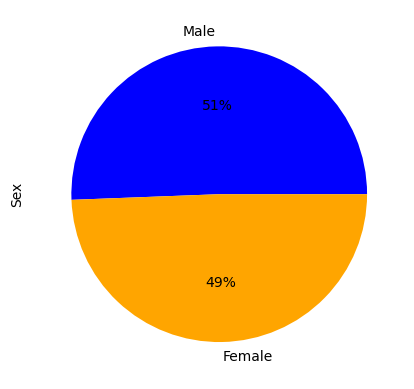

In [103]:

labels = ["Male", "Female"]
count = [958, 935]
colors = ["blue", "orange"]

plt.pie(count, labels=labels, colors=colors,
        autopct="%1.0f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [381]:


max_time = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_time = max_time.reset_index()


merge_df = max_time.merge(df, on=["Mouse ID", "Timepoint"], how = 'left')
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [393]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []


for drug in treatments:
    
    tumor = merge_df.loc[merge_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
        
    tumor_vol_data.append(tumor)
        
    
    quartiles = tumor.quantile([.25,.5,.75])  
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor[(tumor > upper_bound) | (tumor < lower_bound)]
    print(f'{drug} has these outliers: {outliers}')
    
    


Capomulin has these outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane has these outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol has these outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has these outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


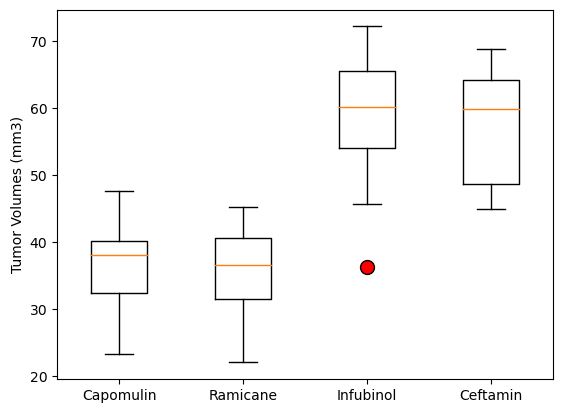

In [397]:

dot = dict(markerfacecolor = 'red', markersize = 10)
plt.boxplot(tumor_vol_data, labels = treatments, flierprops = dot)
plt.ylabel("Tumor Volumes (mm3)")
plt.show()


## Line and Scatter Plots

In [242]:


capomulin = df[["Drug Regimen", "Timepoint", "Mouse ID", "Tumor Volume (mm3)"]]
                      
capomulin_df = capomulin.loc[(capomulin["Drug Regimen"] == "Capomulin") & (capomulin["Mouse ID"] == "l509"), :]


capomulin_df

,Drug Regimen,Timepoint,Mouse ID,Tumor Volume (mm3)
371,Capomulin,0,l509,45.000000
372,Capomulin,5,l509,45.851193
373,Capomulin,10,l509,46.759074
374,Capomulin,15,l509,47.488599
375,Capomulin,20,l509,48.070452
376,Capomulin,25,l509,44.006257
377,Capomulin,30,l509,44.708055
378,Capomulin,35,l509,40.207288
379,Capomulin,40,l509,40.770813
380,Capomulin,45,l509,41.483008


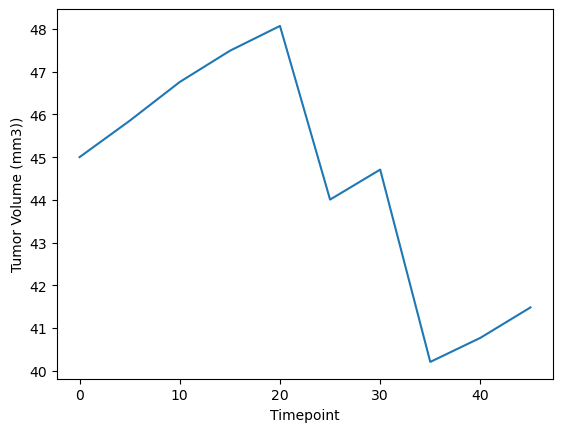

In [400]:
tumor_volumemm3 = capomulin_df["Tumor Volume (mm3)"]
y_axis = tumor_volumemm3

timepoint_capomulin = capomulin_df["Timepoint"]
x_axis = timepoint_capomulin

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3))")
plt.show()

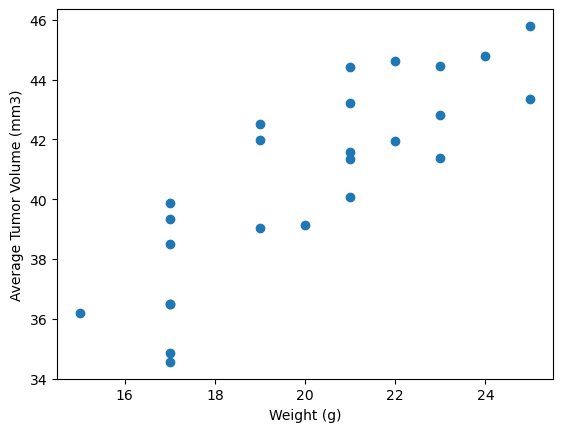

In [273]:

avg_tumor_weight = df[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)", "Drug Regimen"]]


avg_tumor_weight_df = df.loc[df['Drug Regimen'] == "Capomulin"]
avg_tumor_weight = avg_tumor_weight_df.groupby(['Mouse ID']).mean()

x_axis = avg_tumor_weight['Weight (g)']
y_axis = avg_tumor_weight['Tumor Volume (mm3)']

plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


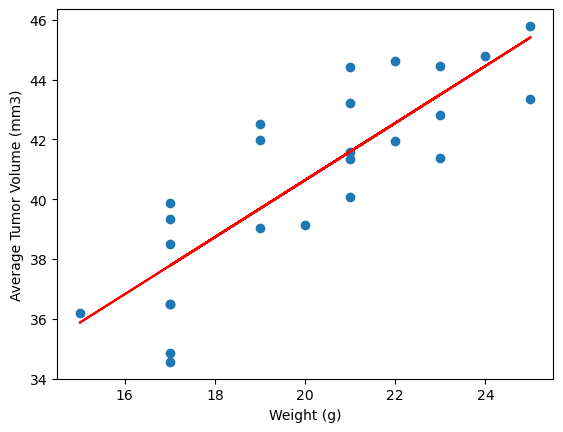

In [283]:
print(f"The correlation between mouse weight and average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()